<a href="https://colab.research.google.com/github/RiseAboveAll/PYTORCH_Learning/blob/master/FeedForward_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network Introduction

**Mathematical Representation of Model:**

```
-  [x1 x2 1] . [w11 w12] = [[x1.w11 + x2.w21 + 1.w31] [x1.w21 + x2.w22 + 1.w32]]
               [w21 w22]
               [w31 w32]

```
Output of First Hidden Layer

```
-  [a,b]=[sigmoid([x1.w11 + x2.w21 + 1.w31]),sigmoid([x1.w21 + x2.w22 + 1.w32])]

```

This output is input to the next Hidden or Output Layer

```
          2nd-Layer Weight
[a,b,1] . [w11] = sigmoid([a.w11 + b.w21 + 1.w31])
          [w21]
          [w31]

```

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Deep Neural Network

## Creating a Data Set

In [2]:
n_pts=500

#Importing Data Set, make_blob() creates the cluster of data points randomly centered around chosen centered point
X,y=datasets.make_circles(n_samples=n_pts,random_state=123,noise=.1,factor=0.2 )
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

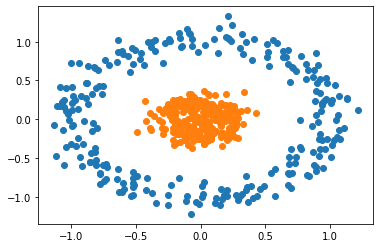

In [3]:
scatter_plot()

In [4]:
torch.Tensor?

In [5]:
#Convert numpy data to tensor
X_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(n_pts,1))

In [6]:
class Model(nn.Module):
  def __init__(self,input_size,H1,output_size):
    super().__init__()
    self.Linear = nn.Linear(input_size,H1)
    self.Linear2=nn.Linear(H1,output_size)
  def forward(self,x):
    x=torch.sigmoid(self.Linear(x))
    x=torch.sigmoid(self.Linear2(x))
    return x
  def pred(self,x):
    pred=self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [12]:
torch.manual_seed(2)
model=Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [13]:
criterion=nn.BCELoss( )
optimizer=torch.optim.Adam(model.parameters(),lr=.01)

In [14]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_data)
  loss=criterion(y_pred,y_data)
  if (i+1)%25==0:
    print("epochs :", i, "Loss :", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epochs : 24 Loss : 0.6939950585365295
epochs : 49 Loss : 0.6931254863739014
epochs : 74 Loss : 0.6926693320274353
epochs : 99 Loss : 0.6905523538589478
epochs : 124 Loss : 0.6822648644447327
epochs : 149 Loss : 0.6645609736442566
epochs : 174 Loss : 0.6355495452880859
epochs : 199 Loss : 0.5843154788017273
epochs : 224 Loss : 0.5217462182044983
epochs : 249 Loss : 0.4697740375995636
epochs : 274 Loss : 0.43216291069984436
epochs : 299 Loss : 0.4049542546272278
epochs : 324 Loss : 0.38438287377357483
epochs : 349 Loss : 0.3674524426460266
epochs : 374 Loss : 0.35056236386299133
epochs : 399 Loss : 0.329036146402359
epochs : 424 Loss : 0.30065762996673584
epochs : 449 Loss : 0.26686468720436096
epochs : 474 Loss : 0.23201490938663483
epochs : 499 Loss : 0.20069856941699982
epochs : 524 Loss : 0.17434927821159363
epochs : 549 Loss : 0.1523941159248352
epochs : 574 Loss : 0.13305553793907166
epochs : 599 Loss : 0.11464519798755646
epochs : 624 Loss : 0.09784946590662003
epochs : 649 Loss :

Text(0.5, 0, 'Epochs')

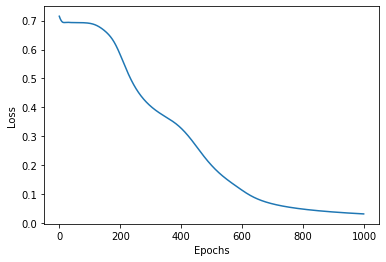

In [15]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

**In the above graph we can see that there are lags in the losses , hence it indicates that learning rate passed in might be too small, hence we need to increase it to make loss curve more smoother.**

In [34]:
torch.manual_seed(2)
model=Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [35]:
criterion=nn.BCELoss( )
optimizer=torch.optim.Adam(model.parameters(),lr=.1)

In [36]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_data)
  loss=criterion(y_pred,y_data)
  if (i+1)%25==0:
    print("epochs :", i, "Loss :", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epochs : 24 Loss : 0.6653285622596741
epochs : 49 Loss : 0.4270012080669403
epochs : 74 Loss : 0.2360769808292389
epochs : 99 Loss : 0.07403954863548279
epochs : 124 Loss : 0.03875089809298515
epochs : 149 Loss : 0.02716524340212345
epochs : 174 Loss : 0.021129800006747246
epochs : 199 Loss : 0.017259638756513596
epochs : 224 Loss : 0.014526035636663437
epochs : 249 Loss : 0.012480225414037704
epochs : 274 Loss : 0.010887730866670609
epochs : 299 Loss : 0.009611702524125576
epochs : 324 Loss : 0.008565888740122318
epochs : 349 Loss : 0.007692829240113497
epochs : 374 Loss : 0.006953040603548288
epochs : 399 Loss : 0.006318974774330854
epochs : 424 Loss : 0.005771162454038858
epochs : 449 Loss : 0.005295274779200554
epochs : 474 Loss : 0.004880106076598167
epochs : 499 Loss : 0.004516412038356066
epochs : 524 Loss : 0.004196359775960445
epochs : 549 Loss : 0.003913298714905977
epochs : 574 Loss : 0.003661641152575612
epochs : 599 Loss : 0.0034367255866527557
epochs : 624 Loss : 0.003234

Text(0.5, 0, 'Epochs')

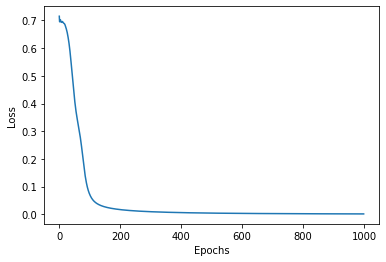

In [37]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

## Testing Model

In [40]:
def plot_decision_boundary(x,y):
  x_span=np.linspace(np.min(x[:,0]),np.max(x[:,0]))
  y_span=np.linspace(np.min(x[:,1]),np.max(x[:,1]))
  xx,yy=np.meshgrid(x_span,y_span)
  grid=torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
  pred_func=model.forward(grid)
  z=pred_func.view(xx.shape).detach().numpy()
  plt.contour(xx,yy,z,colors='black')

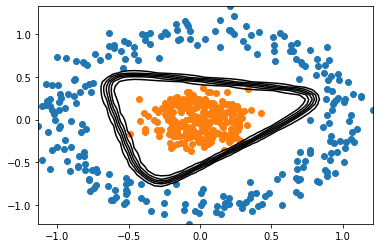

In [41]:
plot_decision_boundary(X,y)
scatter_plot()

In [31]:
plt.contour?